### The German Traffic Sign Benchmark

Download full data set from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

In [1]:
# !wget -c http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip
# !unzip FullIJCNN2013.zip

In [1]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (224, 224)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [2]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', range(0,900), range(0,1213))

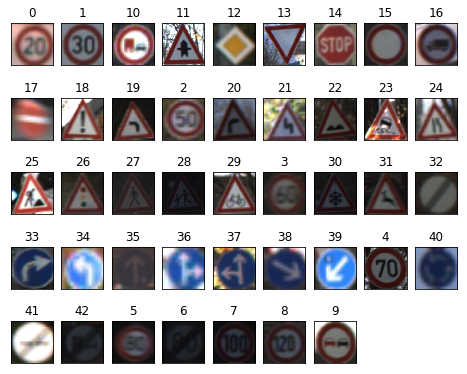

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

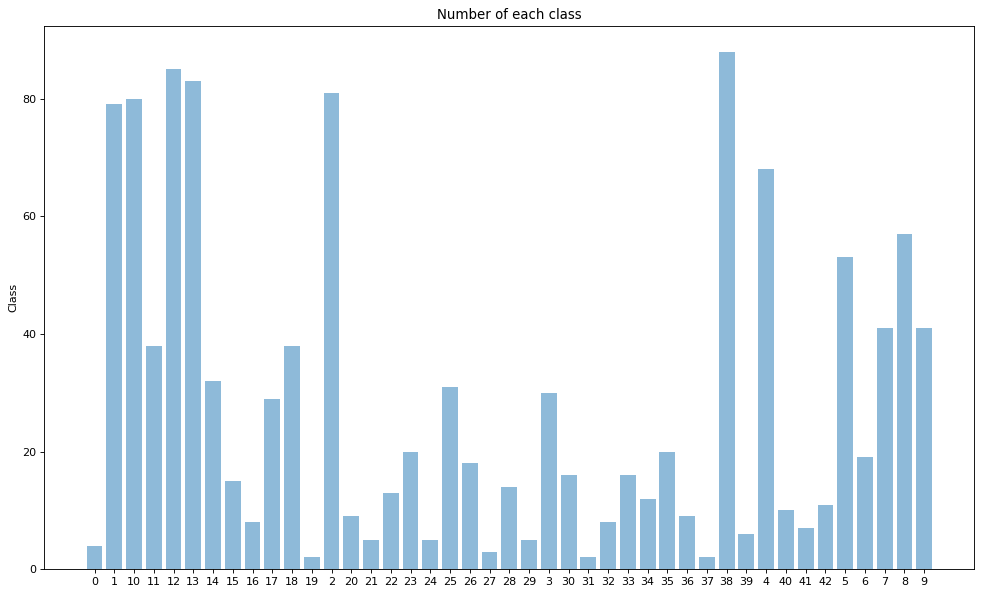

In [4]:
unique, counts = np.unique(train_labels, return_counts=True)

plt.figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
y_pos = np.arange(len(unique))

plt.bar(unique, counts, align='center', alpha=0.5)
plt.xticks(y_pos, unique)
plt.ylabel('Class')
plt.title('Number of each class')
 
plt.show()

In [3]:
left = [i[0] for i in train_bboxes]
top = [i[1] for i in train_bboxes]
right = [i[2] for i in train_bboxes]
bottom = [i[3] for i in train_bboxes]

In [4]:
minleft = min(left)
print("minleft = " + str(minleft))
maxright = max(left)
print("maxright = " + str(maxright))
mintop = min(top)
print("mintop = " + str(minleft))
maxtop = max(top)
print("maxtop = " + str(maxtop))
minright = min(right)
print("minright = " + str(minright))
maxright = max(right)
print("maxright = " + str(maxright))
minbottom = min(bottom)
print("minbottom = " + str(minbottom))
maxbottom = max(bottom)
print("maxbottom = " + str(maxbottom))

minleft = 16.5
maxright = 978.75
mintop = 16.5
maxtop = 477.75
minright = 42.75
maxright = 1009.5
minbottom = 77.25
maxbottom = 561.0


In [5]:
def area(boxes):
    """Computes area of boxes.
    Args:
    boxes: Numpy array with shape [N, 4] holding N boxes
    Returns:
    a numpy array with shape [N*1] representing box areas
    """
    return (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1])

In [6]:
train_bboxes[1].reshape(1,4)

array([[737.25, 291.  , 768.  , 324.  ]])

In [7]:
area(train_bboxes[1].reshape(1,4))

array([1014.75])

In [8]:
areamin = np.min(area(np.asarray(train_bboxes)))
print("areamin = " + str(areamin))
areamax = np.max(area(np.asarray(train_bboxes)))
print("areamax = " + str(areamax))

areamin = 144.0
areamax = 8649.0


In [10]:
ratios = [(i[2]-i[0])/(i[3]-i[1]) for i in train_bboxes]

In [17]:
print("minratio = " + str(min(ratios)))
print("maxratio = " + str(max(ratios)))

minratio = 0.5862068965517241
maxratio = 1.2666666666666666
